##  first trainning in ML using scikit learn !~

In [1]:
## we will first import some important libraries ! 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [2]:
!python -m pip install scikit-learn matplotlib 

In [3]:
## Loading the dataset 

In [4]:
iris = load_iris()

In [5]:
# data info ! 

In [6]:
print(f"Total samples:{len(iris.data)}")
print(f"total features:{len(iris.feature_names)}")
print(f"total classes :{list(iris.target_names)}")


Total samples:150
total features:4
total classes :[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [7]:
## to display features names ! 

In [8]:
for i , feature in enumerate (iris.feature_names,1):
    print(f"{i}.{feature}")

1.sepal length (cm)
2.sepal width (cm)
3.petal length (cm)
4.petal width (cm)


In [9]:
## to display  the target names 
for i , name in enumerate (iris.target_names):
    print(f"{i}. {name} (coded as {i})")

0. setosa (coded as 0)
1. versicolor (coded as 1)
2. virginica (coded as 2)


In [10]:
##  data ! 

In [11]:
for  i in range(5):
    print(f"flower{i+1}:")
    print(f"measurments{iris.data[i]}")
    print(f"Actual species :{iris.target_names[iris.target[i]]}")

flower1:
measurments[5.1 3.5 1.4 0.2]
Actual species :setosa
flower2:
measurments[4.9 3.  1.4 0.2]
Actual species :setosa
flower3:
measurments[4.7 3.2 1.3 0.2]
Actual species :setosa
flower4:
measurments[4.6 3.1 1.5 0.2]
Actual species :setosa
flower5:
measurments[5.  3.6 1.4 0.2]
Actual species :setosa


In [13]:
## Spliting the data ! 


In [14]:
iris.data.shape

(150, 4)

In [18]:
x_train, x_test,y_train , y_test = train_test_split(
iris.data,
iris.target,
test_size = 0.2,
random_state = 42,
shuffle = True , 

)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [19]:
## Creating the model 

In [22]:
model = DecisionTreeClassifier(

   max_depth = 3 , ## limit how deep the tree grows ! 
   random_state = 42  # for reporducibility 
    
)
print(f"model type -> {type(model)}")
model.get_params()

model type -> <class 'sklearn.tree._classes.DecisionTreeClassifier'>


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [23]:
## Training the model ! 

In [24]:
# this is the training command 

model.fit(x_train,y_train)
print("done ! ")

done ! 


In [25]:
## how the train works and what happened ! 
len(x_train)

120

In [26]:
x_train.shape[1]

4

In [29]:
## learn 
len(np.unique(y_train))
# it means it learn to distinguish between 3 species !

3

In [30]:
# feature importance 

In [32]:
importance = model.feature_importances_
for i , (feature,importance) in enumerate (zip(iris.feature_names,importance)):
    print(f"{i+1}. {feature}: {importance:.3f} ({importance*100:.1f}%)")

1. sepal length (cm): 0.000 (0.0%)
2. sepal width (cm): 0.000 (0.0%)
3. petal length (cm): 0.935 (93.5%)
4. petal width (cm): 0.065 (6.5%)


In [33]:
## the actual tree ! 

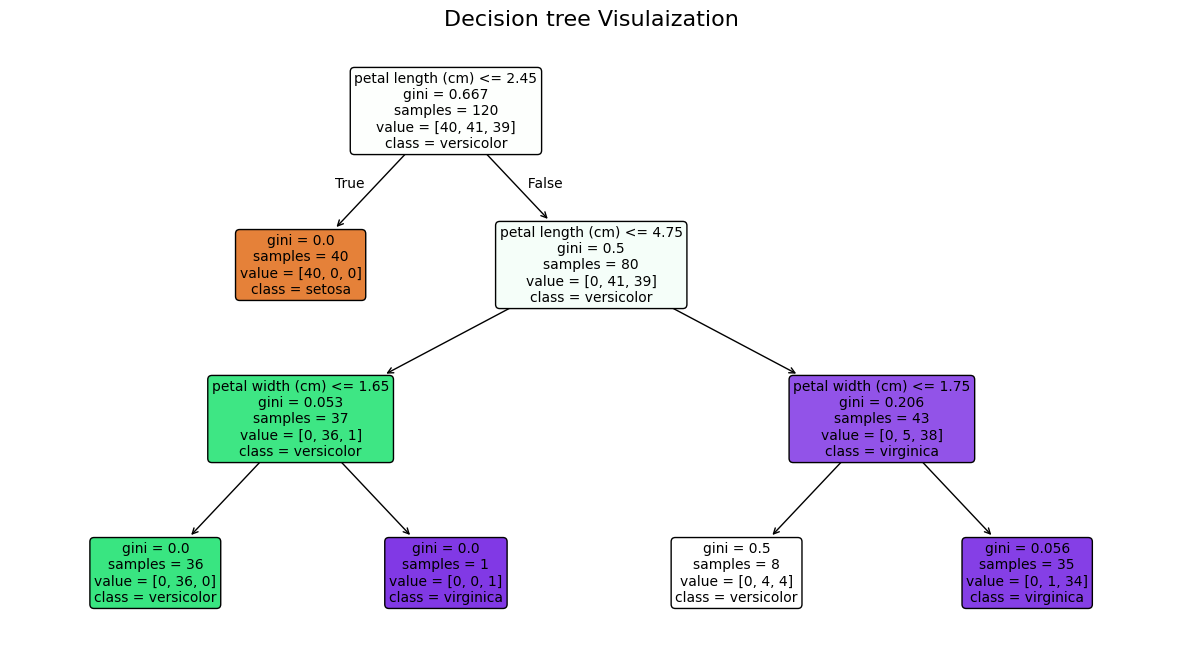

In [36]:
from sklearn.tree  import plot_tree
import matplotlib.pyplot  as plt 

plt.figure(figsize=(15,8))

plot_tree(model , 
           feature_names=iris.feature_names,
           class_names = iris.target_names,
           filled = True , 
           rounded  = True , 
           fontsize = 10 
)

plt.title("Decision tree Visulaization" , fontsize = 16 )
plt.show()

In [37]:
## so for testing the  test of the model 

In [38]:
y_pred = model.predict(x_test)
#command for prediction 

In [39]:
correct_count = 0 

In [40]:
for i in range(10):
    predicted = y_pred[i]
    actual = y_test[i]


    # converting codes into names 

    predicted_name = iris.target_names[predicted]
    actual_name = iris.target_names[actual]

In [41]:
is_correct = predicted == actual 
if is_correct:
    correct_count +=1 

In [42]:
## display with colot coding ! 

In [44]:
print(f"Flower {i}: Predicted {predicted_name} ({predicted}), "
          f"Actual {actual_name} ({actual})")

print(f"\nAccuracy on first 10: {correct_count}/10 = {correct_count/10*100:.1f}%")

Flower 9: Predicted versicolor (1), Actual versicolor (1)

Accuracy on first 10: 1/10 = 10.0%


In [45]:
##  test 

In [46]:
test_flower =  [[5.1, 3.5, 1.4, 0.2]] 
prediction = model.predict(test_flower)
print(f"prediction:{iris.target_names[prediction]}")

prediction:['setosa']
